<a href="https://colab.research.google.com/github/charite-uwatwembi/Machine_Learning-Pipeline/blob/main/ml_pipeline_%5BCharite_Uwatwembi%5D_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Crop Disease Prediction Using Images

## Student Name: Charite Uwatwembi

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **Your answer for data sources goes here **
   - Kaggle Datasets: While Kaggle is an excellent resource, exploring other sources for diversity is essential.

   - Research Papers and Open-Access Repositories:
     - PlantVillage Dataset

  - Non-Kaggle Platforms:
      - Global Open Data for Agriculture and Nutrition (GODAN)

  - Government and Academic Databases:
    - FAO (Food and Agriculture Organization of the United Nations): For general crop health and disease reports.
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **Your answer for data agggregation goes here **
   - Aggregating data from PlantVillage, GODAN, FAO reports, and other sources is crucial to enhance the dataset's comprehensiveness and variability, resulting in more reliable and accurate model predictions.










In [ ]:
#insert code if necessary
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3


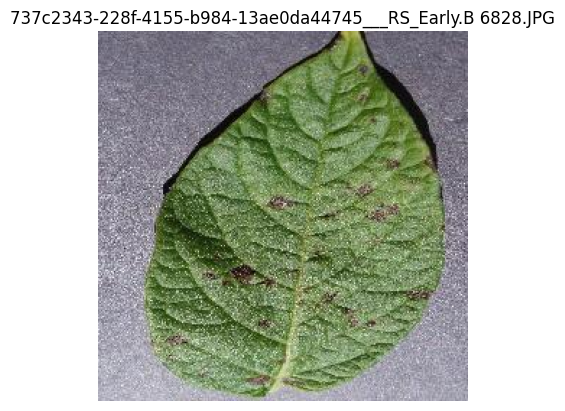

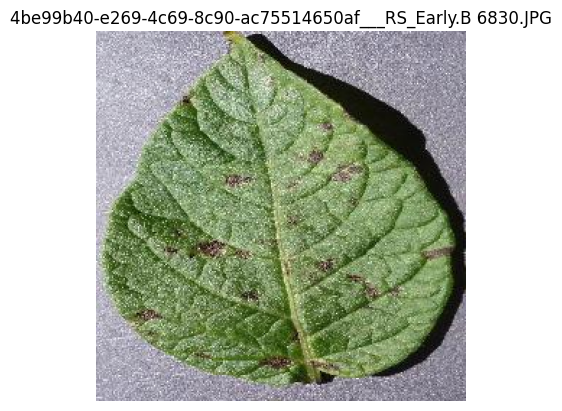

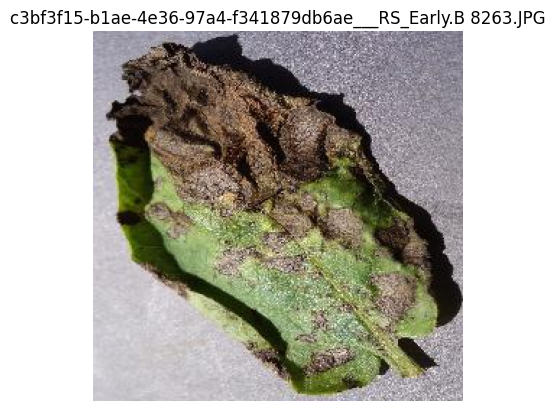

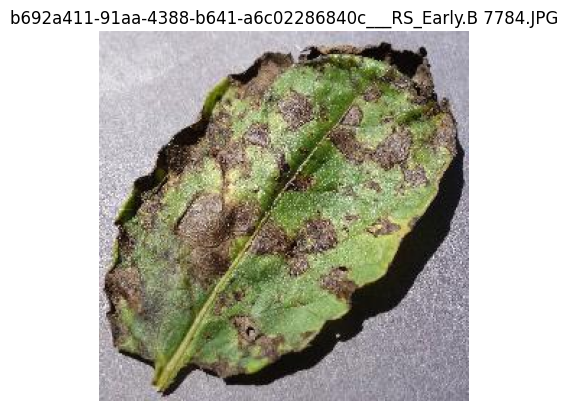

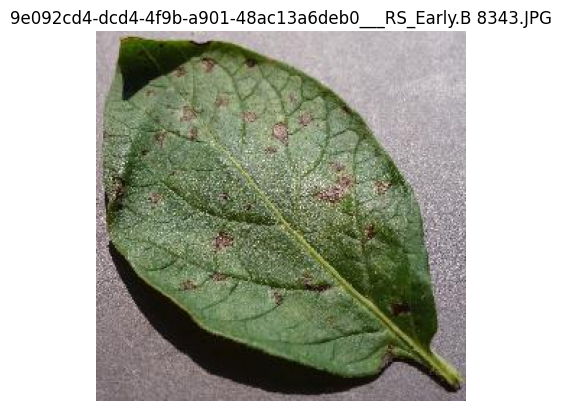

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the category containing images
sample_images_path = "/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color/Potato___Early_blight"

# List a few images from the category
sample_images = os.listdir(sample_images_path)[:5]

# Display the images
for image_name in sample_images:
    image_path = os.path.join(sample_images_path, image_name)
    with Image.open(image_path) as img:
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
        plt.show()




2. **Data Format Transformation:**
   - Describe the current format of the data.

    

   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Your answer for data transformation goes here **

- **Current Format**: The dataset contains images categorized into subdirectories based on the type of crop disease or healthy status.

- **Planned Transformation**:
    - Transform the image dataset into a structured format by creating a DataFrame that maps image paths to their corresponding labels (e.g., disease type or 'healthy').

    - Preprocess images to ensure uniformity in size and color channels (e.g., resizing to 256x256 and converting to RGB).

    - Normalize pixel values to fall between 0 and 1 for better performance during training.
    
The current image dataset will be transformed into a structured format suitable for image classification tasks. Each image will be resized, normalized, and associated with its label.

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**


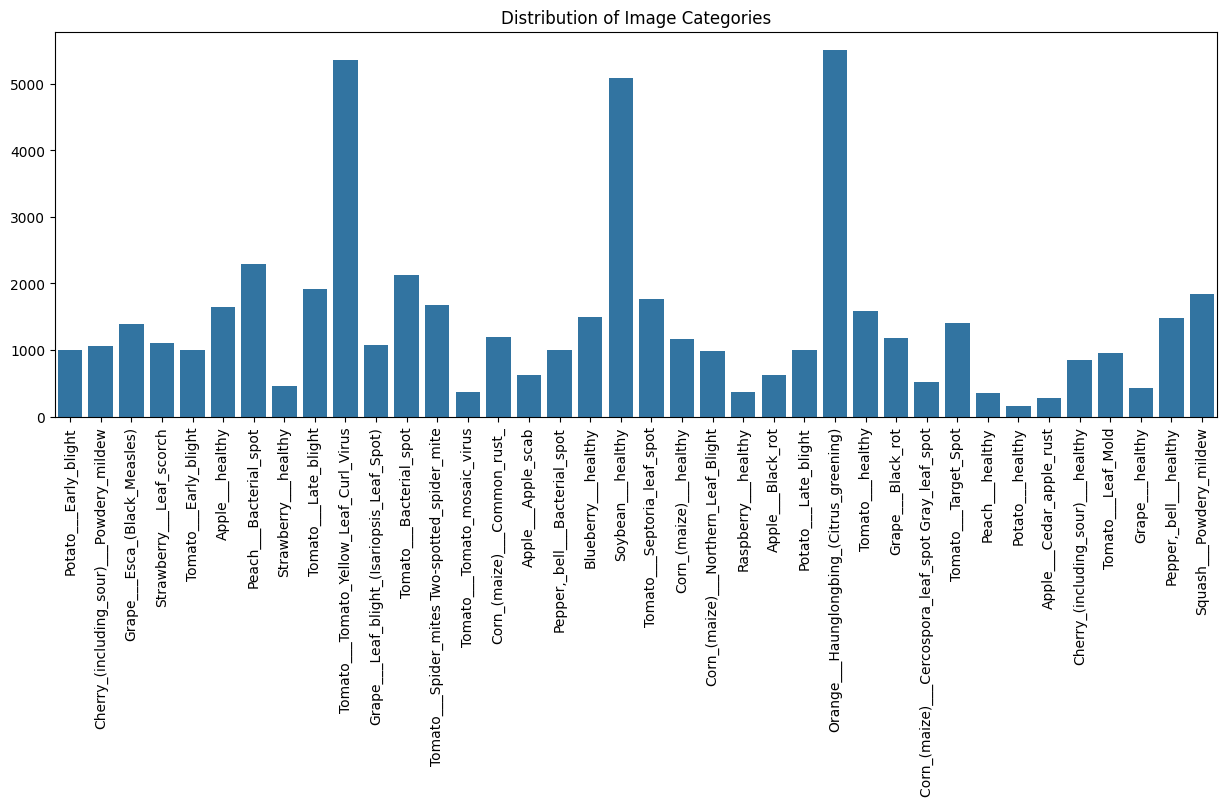

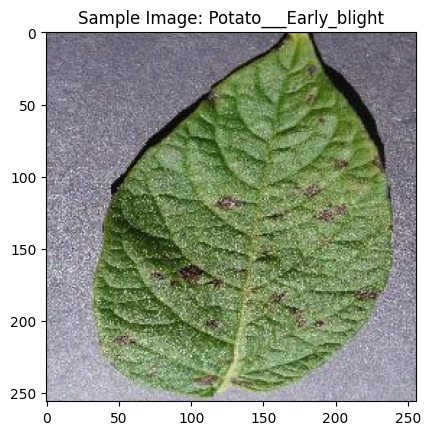

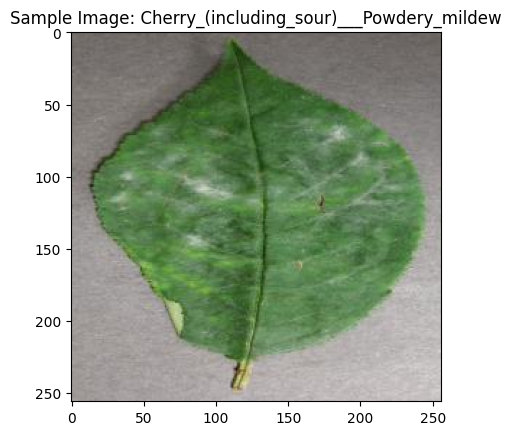

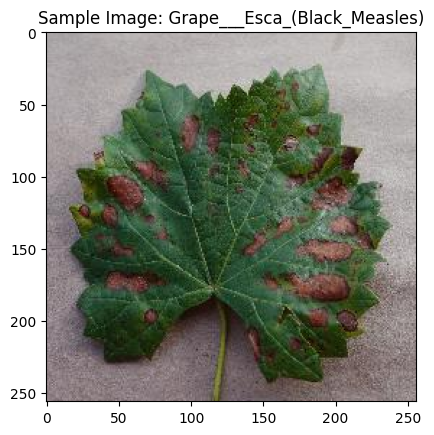

In [ ]:
# Set the correct dataset path
dataset_path = '/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset'

# Sample code for data exploration
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of labels
label_counts = [len(files) for root, dirs, files in os.walk(dataset_path + '/color') if files]
labels = [dir_name for dir_name in os.listdir(dataset_path + '/color')]

# Plot distribution of categories
plt.figure(figsize=(15, 5))
sns.barplot(x=labels, y=label_counts)
plt.title('Distribution of Image Categories')
plt.xticks(rotation=90)
plt.show()

# Display sample images
for category in labels[:3]:  # Display 3 sample categories
    image_path = os.path.join(dataset_path, 'color', category, os.listdir(os.path.join(dataset_path, 'color', category))[0])
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f'Sample Image: {category}')
    plt.show()




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Your answer for Hypothesis Testing goes here **

**Preexisting Hypotheses**:

  1. Certain plant diseases are more prevalent in specific weather conditions.

  2. The dataset distribution is imbalanced, with some categories having significantly more samples than others.

  3. There are variations in image quality that could affect model performance.
  
**Methodologies to Test These Hypotheses**:

  - **Distribution Analysis**:
    Plot the distribution of images per disease category to confirm dataset balance.
  - **Image Quality Assessment**:
    Implement image quality metrics (e.g., brightness, contrast) to evaluate consistency.
  - **Weather Correlation**:
    If metadata on collection conditions is available, run correlation tests between disease prevalence and weather attributes.
    

5. **Handling Sparse/Dense Data and Outliers:**

   **Handling Sparse Data**
  - Explanation: Sparse data can occur when there are missing values or when the dataset has features with many zero or null values. This can lead to difficulties during model training as it may reduce the model's predictive power.
  - **Strategies**:
    - Filling Missing Values: Use imputation techniques like mean, median, or mode imputation.

    - Dimensionality Reduction: Use techniques like Principal Component Analysis (PCA) to reduce the number of features and remove those with low variance.
    
    - Feature Engineering: Combine related features to reduce sparsity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Example DataFrame with missing values
data = pd.DataFrame({
    'Feature1': [1, 2, None, 4, 5, None, 7],
    'Feature2': [None, 20, 25, None, 15, 30, 35],
    'Feature3': [5, 3, 6, 2, 4, 8, None]
})

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print("Data after imputation:\n", data_imputed)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_imputed)

print("Data after PCA:\n", data_reduced)


Data after imputation:
    Feature1  Feature2  Feature3
0       1.0      25.0  5.000000
1       2.0      20.0  3.000000
2       3.8      25.0  6.000000
3       4.0      25.0  2.000000
4       5.0      15.0  4.000000
5       3.8      30.0  8.000000
6       7.0      35.0  4.666667
Data after PCA:
 [[-0.29651858 -2.23877384]
 [-5.35904601 -0.15593115]
 [ 0.17757081 -0.93005512]
 [-0.33079082  2.00341453]
 [-9.77853106  1.26733043]
 [ 5.36185227 -2.29637637]
 [10.22546338  2.35039151]]


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **

 **Data Splitting**
  - **Methodology**:

    - Use train_test_split to divide data into training (70%), validation (15%), and testing (15%) sets.
    - Ensure representativeness by stratifying based on labels.

  **Bias Mitigation**
  - **Explanation**: Bias in data can lead to unfair predictions, especially if certain groups are underrepresented. Addressing this ensures fairness and improves generalization.

  - **Strategies**:
    - Data Augmentation: Augment data to balance classes.
    - Re-sampling: Use techniques like over-sampling (e.g., SMOTE) for minority classes or under-sampling for majority classes.
    - Bias Detection: Apply statistical tests or metrics (e.g., demographic parity, equal opportunity) to check for bias.



Class distribution before SMOTE: [ 20 180]
Class distribution after SMOTE: [180 180]


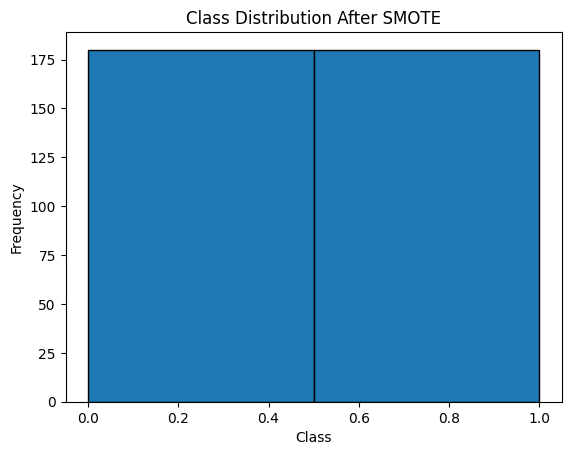

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate imbalanced data
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=5, n_clusters_per_class=1, n_samples=200, random_state=10)

# Check initial class distribution
print("Class distribution before SMOTE:", np.bincount(y))

# Apply SMOTE for over-sampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_resampled))

# Plot distribution of resampled data
plt.hist(y_resampled, bins=2, edgecolor='black')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]

  **Types of Data Handling**
  - **Data Classification**:

    - **Categorical**: Labels, plant species, conditions.
    - **Numerical**: Image pixel values, histogram data.

  - **Preprocessing**:

    - **Categorical**: Label encoding or one-hot encoding.
    - **Numerical**: Scaling (MinMaxScaler/StandardScaler)



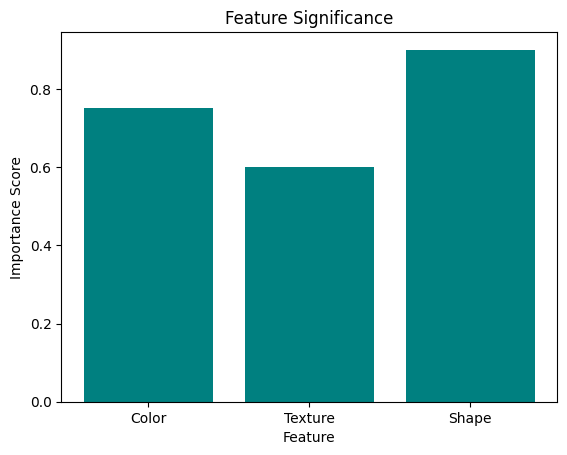

In [ ]:
#print out relevant features
# Feature importance plotting
import matplotlib.pyplot as plt
import numpy as np

# Sample feature scores
feature_names = ['Color', 'Texture', 'Shape']
feature_scores = [0.75, 0.6, 0.9]

plt.bar(feature_names, feature_scores, color='teal')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Significance')
plt.show()



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

    **Data Transformation for Modeling**
    - **Methods**:

        - Normalize pixel values (0-255 range) to (0-1).
        - Apply data augmentation for model robustness.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

    **Data Storage**
    - **Storage Solution**:

      - Store preprocessed data in a structured format such as HDF5 or in cloud storage with easy access.
      - Ensure data security with controlled access permissions.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.